### Download, Correlate and Plot two trading pairs

In [120]:
import yfinance as yf
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt



In [121]:
Pairs = "BTC-USD, ETH-USD"

#### Download data from Yahoo Finance

In [190]:
data_history = yf.download(Pairs, start="2021-01-01", end="2023-06-01", interval="1d")
data_recent = yf.download(Pairs, start="2023-01-01", end="2023-10-16", interval="1d")
data_last_week = yf.download(Pairs, start="2023-10-01", end="2023-10-16", interval="1d")

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [191]:
data_history = data_history["Close"]
data_recent = data_recent["Close"]
data_last_week = data_last_week["Close"]

In [192]:
data_history.dropna(inplace = True)
data_recent.dropna(inplace = True)
data_last_week.dropna(inplace = True)

#### Correlation

In [193]:
data_history.corr(), 

(          BTC-USD   ETH-USD
 BTC-USD  1.000000  0.781072
 ETH-USD  0.781072  1.000000,)

In [194]:
data_recent.corr()

,BTC-USD,ETH-USD
BTC-USD,1.000000,0.892738
ETH-USD,0.892738,1.000000


In [195]:
data_last_week.corr()

,BTC-USD,ETH-USD
BTC-USD,1.000000,0.676889
ETH-USD,0.676889,1.000000


### Plotting 

In [196]:
col1 = data_recent.columns[0]
col2 = data_recent.columns[1]

In [197]:
data_history = pd.DataFrame(data_history)
data_recent = pd.DataFrame(data_recent)
data_last_week = pd.DataFrame(data_last_week)

In [198]:
data_recent.reset_index(inplace = True)

In [199]:
y = data_recent["BTC-USD"]
z = data_recent["ETH-USD"]
x = data_recent["Date"]

In [200]:
y = data_recent.iloc[:, 1] #data from second column
z = data_recent.iloc[:, 2] #data from third column
x = data_recent.iloc[:, 0] #date data from zero index column

Text(0, 0.5, "{'ETH-USD'}")

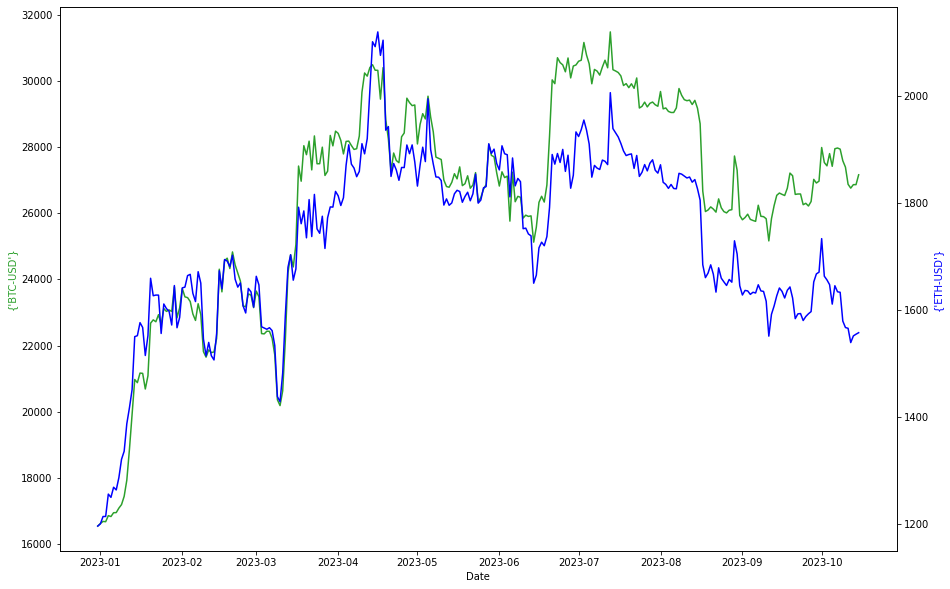

In [201]:
fig, ax1 = plt.subplots(figsize = (15,10))
ax2 = ax1.twinx()

color = 'tab:green'
ax1.plot(x, y, color = color)
ax1.set_xlabel('Date')
ax1.set_ylabel({col1}, color = color)

ax2.plot(x,z, 'b-', label = {col2})
ax2.set_ylabel({col2}, color = 'b')